ANALISIS DE PÉLICULAS PREMIOS OSCAR



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/the_oscar_award 1927 -2023.csv")


Muestro las primeras 10 líneas del dataframe para obtener la información que contiene

In [5]:
df = pd.read_csv("/content/the_oscar_award 1927 -2023.csv",delimiter = ",", on_bad_lines='skip')
df.head(10)

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False
5,1927,1928,1,ART DIRECTION,Rochus Gliese,Sunrise,False
6,1927,1928,1,ART DIRECTION,William Cameron Menzies,The Dove;,True
7,1927,1928,1,ART DIRECTION,Harry Oliver,7th Heaven,False
8,1927,1928,1,CINEMATOGRAPHY,George Barnes,The Devil Dancer;,False
9,1927,1928,1,CINEMATOGRAPHY,Charles Rosher,Sunrise,True


revisamos los valores nulos

In [6]:
df.isnull().sum()

year_film          0
year_ceremony      0
ceremony           0
category           0
name               3
film             310
winner             0
dtype: int64

revisamos los valores ausentes

In [7]:
df.isna().sum()

year_film          0
year_ceremony      0
ceremony           0
category           0
name               3
film             310
winner             0
dtype: int64

Eliminamos valores nulos y ausentes y comprobamos

In [8]:
df = df.dropna()
df.isna().sum()

year_film        0
year_ceremony    0
ceremony         0
category         0
name             0
film             0
winner           0
dtype: int64

Visualizamos los últimos datos del dataset para ver las películas más recientes

In [9]:
df.tail(10)

,year_film,year_ceremony,ceremony,category,name,film,winner
10749,2022,2023,95,Writing (Adapted Screenplay),"Screenplay - Edward Berger, Lesley Paterson & ...",All Quiet on the Western Front,False
10750,2022,2023,95,Writing (Adapted Screenplay),Written by Rian Johnson,Glass Onion: A Knives Out Mystery,False
10751,2022,2023,95,Writing (Adapted Screenplay),Written by Kazuo Ishiguro,Living,False
10752,2022,2023,95,Writing (Adapted Screenplay),Screenplay by Ehren Kruger and Eric Warren Sin...,Top Gun: Maverick,False
10753,2022,2023,95,Writing (Adapted Screenplay),Screenplay by Sarah Polley,Women Talking,True
10754,2022,2023,95,Writing (Original Screenplay),Written by Martin McDonagh,The Banshees of Inisherin,False
10755,2022,2023,95,Writing (Original Screenplay),Written by Daniel Kwan & Daniel Scheinert,Everything Everywhere All at Once,True
10756,2022,2023,95,Writing (Original Screenplay),Written by Steven Spielberg & Tony Kushner,The Fabelmans,False
10757,2022,2023,95,Writing (Original Screenplay),Written by Todd Field,Tár,False
10758,2022,2023,95,Writing (Original Screenplay),Written by Ruben Östlund,Triangle of Sadness,False


Cómo en category tenemos difetentes tipos de letra vamos a estandarizar todo a mayúsculas

In [10]:
df["category"] = df["category"].str.upper()
df["category"]

0                                ACTOR
1                                ACTOR
2                              ACTRESS
3                              ACTRESS
4                              ACTRESS
                     ...              
10754    WRITING (ORIGINAL SCREENPLAY)
10755    WRITING (ORIGINAL SCREENPLAY)
10756    WRITING (ORIGINAL SCREENPLAY)
10757    WRITING (ORIGINAL SCREENPLAY)
10758    WRITING (ORIGINAL SCREENPLAY)
Name: category, Length: 10449, dtype: object

ANALISIS DE DATOS

De todas las películas que han sido nominadas a los oscar ¿cuáles han sido las ganadoras?

In [11]:
Películas_Ganadoras = df[df["winner"] == True]
Películas_Ganadoras

,year_film,year_ceremony,ceremony,category,name,film,winner
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
6,1927,1928,1,ART DIRECTION,William Cameron Menzies,The Dove;,True
9,1927,1928,1,CINEMATOGRAPHY,Charles Rosher,Sunrise,True
10,1927,1928,1,CINEMATOGRAPHY,Karl Struss,Sunrise,True
...,...,...,...,...,...,...,...
10734,2022,2023,95,SHORT FILM (LIVE ACTION),Tom Berkeley and Ross White,An Irish Goodbye,True
10743,2022,2023,95,SOUND,"Mark Weingarten, James H. Mather, Al Nelson, C...",Top Gun: Maverick,True
10745,2022,2023,95,VISUAL EFFECTS,"Joe Letteri, Richard Baneham, Eric Saindon and...",Avatar: The Way of Water,True
10753,2022,2023,95,WRITING (ADAPTED SCREENPLAY),Screenplay by Sarah Polley,Women Talking,True


De todas las ganadoras, ranking de 10 películas que han obtenido más premios

In [12]:
Top10_Ganadoras = Películas_Ganadoras[["film","winner","year_film"]].groupby(["film","year_film"]).count()
Top10_Ganadoras = Top10_Ganadoras.sort_values("winner", ascending=False )
Top10_Ganadoras.head(10)

,,winner
film,year_film,
Titanic,1997,11
The Lord of the Rings: The Return of the King,2003,11
Ben-Hur,1959,11
West Side Story,1961,10
Gigi,1958,9
The English Patient,1996,9
The Last Emperor,1987,9
Gone with the Wind,1939,8
Cabaret,1972,8


In [18]:
Top10_Ganadoras = pd.DataFrame(Top10_Ganadoras.head(10))
Top10_Ganadoras = Top10_Ganadoras.reset_index()
Top10_Ganadoras.columns

Index(['film', 'year_film', 'winner'], dtype='object')

<ipython-input-19-8c9ce1d6db7e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='film', y='winner', data=Top10_Ganadoras, palette = ["black","red"])
<ipython-input-19-8c9ce1d6db7e>:7: UserWarning: 
The palette list has fewer values (2) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='film', y='winner', data=Top10_Ganadoras, palette = ["black","red"])
<ipython-input-19-8c9ce1d6db7e>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


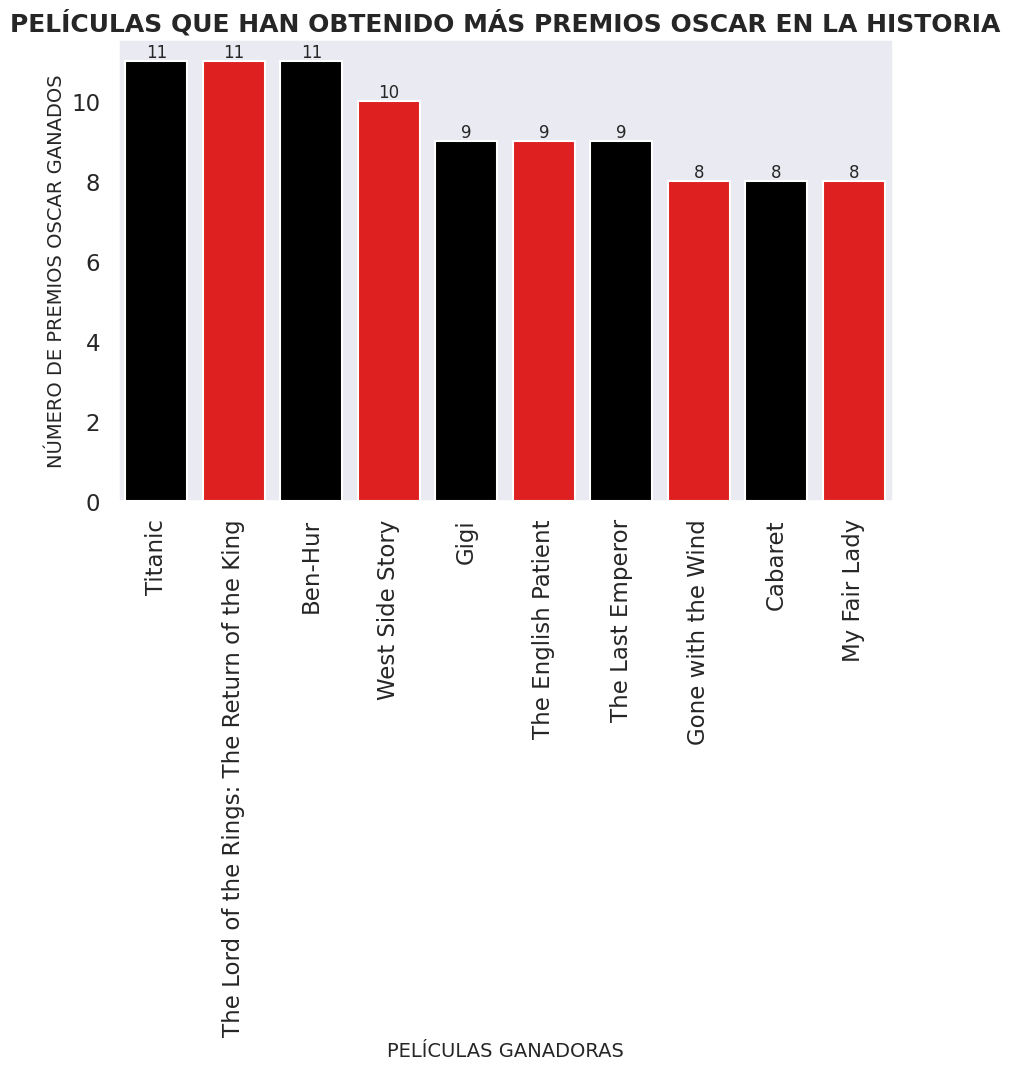

In [19]:
sns.set_style("dark")
sns.set_context("talk")
plt.figure(figsize=(10, 6))

ax = plt.subplot()

sns.barplot(x='film', y='winner', data=Top10_Ganadoras, palette = ["black","red"])

#Poner título a mi gráfico
ax.set_title('PELÍCULAS QUE HAN OBTENIDO MÁS PREMIOS OSCAR EN LA HISTORIA',fontsize=18, fontweight='bold')


#Nombrar y modificar eje X y eje Y
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('PELÍCULAS GANADORAS', fontsize=14)
ax.set_ylabel('NÚMERO DE PREMIOS OSCAR GANADOS', fontsize=14)

#Agregar valores a las barras
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=12)

#Guardar mi gráfico
plt.savefig('gráfico1.png')

#Mostrar gráfico
plt.show()

películas con más nominaciones

In [20]:
Top10_Nominaciones = df[["film","winner","year_film"]].groupby(["film","year_film"]).count()
Top10_Nominaciones = Top10_Nominaciones.sort_values("winner", ascending=False )
Top10_Nominaciones.head(10)

,,winner
film,year_film,
Titanic,1997,14
La La Land,2016,14
All about Eve,1950,14
Mary Poppins,1964,13
Gone with the Wind,1939,13
Shakespeare in Love,1998,13
Forrest Gump,1994,13
The Curious Case of Benjamin Button,2008,13
Who's Afraid of Virginia Woolf?,1966,13


Nominaciones premios oscar 2023

---



In [23]:
Nominaciones_2023 = df[["year_film","film","category", "name","winner"]]
Nominaciones_2023 = Nominaciones_2023[Nominaciones_2023["year_film"] == 2022]
Nominaciones_2023

,year_film,film,category,name,winner
10639,2022,Elvis,ACTOR IN A LEADING ROLE,Austin Butler,False
10640,2022,The Banshees of Inisherin,ACTOR IN A LEADING ROLE,Colin Farrell,False
10641,2022,The Whale,ACTOR IN A LEADING ROLE,Brendan Fraser,True
10642,2022,Aftersun,ACTOR IN A LEADING ROLE,Paul Mescal,False
10643,2022,Living,ACTOR IN A LEADING ROLE,Bill Nighy,False
...,...,...,...,...,...
10754,2022,The Banshees of Inisherin,WRITING (ORIGINAL SCREENPLAY),Written by Martin McDonagh,False
10755,2022,Everything Everywhere All at Once,WRITING (ORIGINAL SCREENPLAY),Written by Daniel Kwan & Daniel Scheinert,True
10756,2022,The Fabelmans,WRITING (ORIGINAL SCREENPLAY),Written by Steven Spielberg & Tony Kushner,False
10757,2022,Tár,WRITING (ORIGINAL SCREENPLAY),Written by Todd Field,False


Ganadores premios oscar 2023

In [24]:
Ganadores_2023 = Nominaciones_2023[Nominaciones_2023["winner"]==True]
Ganadores_2023

,year_film,film,category,name,winner
10641,2022,The Whale,ACTOR IN A LEADING ROLE,Brendan Fraser,True
10648,2022,Everything Everywhere All at Once,ACTOR IN A SUPPORTING ROLE,Ke Huy Quan,True
10653,2022,Everything Everywhere All at Once,ACTRESS IN A LEADING ROLE,Michelle Yeoh,True
10657,2022,Everything Everywhere All at Once,ACTRESS IN A SUPPORTING ROLE,Jamie Lee Curtis,True
10659,2022,Guillermo del Toro's Pinocchio,ANIMATED FEATURE FILM,"Guillermo del Toro, Mark Gustafson, Gary Ungar...",True
10664,2022,All Quiet on the Western Front,CINEMATOGRAPHY,James Friend,True
10670,2022,Black Panther: Wakanda Forever,COSTUME DESIGN,Ruth Carter,True
10675,2022,Everything Everywhere All at Once,DIRECTING,Daniel Kwan and Daniel Scheinert,True
10683,2022,Navalny,DOCUMENTARY FEATURE FILM,"Daniel Roher, Odessa Rae, Diane Becker, Melani...",True
10684,2022,The Elephant Whisperers,DOCUMENTARY SHORT FILM,Kartiki Gonsalves and Guneet Monga,True


películas con más premios ganados en 2023

In [25]:
Top_Ganadores2023 = Ganadores_2023[["film","winner"]].groupby("film").count()
Top_Ganadores2023 = Top_Ganadores2023.sort_values("winner",ascending = False)
Top_Ganadores2023

,winner
film,
Everything Everywhere All at Once,7
All Quiet on the Western Front,4
The Whale,2
An Irish Goodbye,1
Avatar: The Way of Water,1
Black Panther: Wakanda Forever,1
Guillermo del Toro's Pinocchio,1
Navalny,1
RRR,1


In [26]:
Top_Ganadores2023 = Top_Ganadores2023.reset_index()
Top_Ganadores2023.columns

Index(['film', 'winner'], dtype='object')

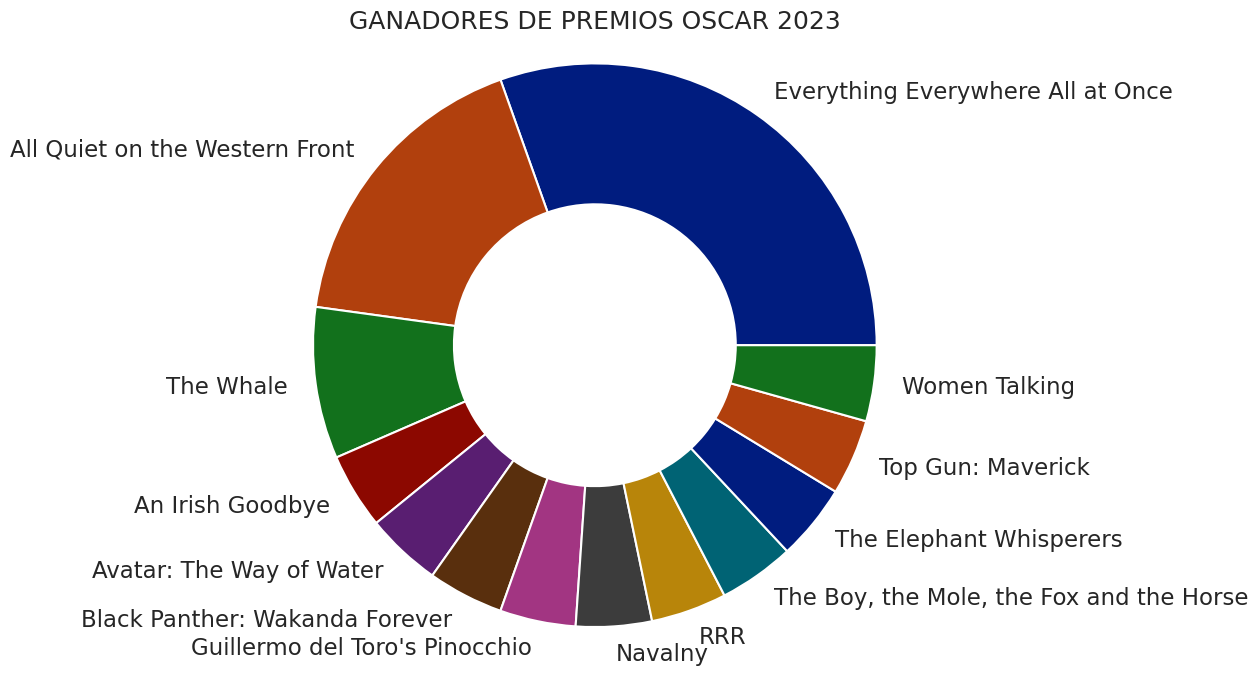

In [29]:
categorias = list(Top_Ganadores2023["film"])
valores = list(Top_Ganadores2023["winner"])

#Set para el doughnut
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)

#Gráfico
ax.pie(valores, labels=categorias, colors=sns.color_palette('dark'), wedgeprops={'width': 0.5})
circulo_central = plt.Circle((0,0), 0.3, color='white')
ax.add_artist(circulo_central)

#Título
ax.set_title('GANADORES DE PREMIOS OSCAR 2023')
ax.axis('equal')

#Guardar mi gráfico
plt.savefig('gráfico4.png')

plt.show()